<a href="https://colab.research.google.com/github/huynhdangthanhtam/image-classification/blob/main/image_classification_Model_architectures_LeNet_and_VGG_16__datasheets_Cassava_Leaf_Disease_and_Concrete_Crack_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1 - Build Convolution Neural Network with Lenet Model

In [ ]:
import tensorflow as tf

In [ ]:
output_size = 10
img_size= 28
lenet_model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(filters = 6, kernel_size = 5, activation = 'relu',  padding='same', input_shape = (img_size, img_size, 3), name = 'C1'), # C1 your code here
            tf.keras.layers.AvgPool2D(pool_size = 2, strides = 2, name = 'S2'), 
            tf.keras.layers.Conv2D(filters = 16, kernel_size = 5, activation = 'relu', name = 'C3'), 
            tf.keras.layers.AvgPool2D(pool_size = 2, strides = 2, name = 'S4'), 
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation = 'relu', name = 'C5'), 
            tf.keras.layers.Dense(84, activation = 'relu', name = 'F6'), 
            tf.keras.layers.Dense(output_size, activation = 'softmax')]) 

lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 28, 28, 6)         456       
                                                                 
 S2 (AveragePooling2D)       (None, 14, 14, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 10, 10, 16)        2416      
                                                                 
 S4 (AveragePooling2D)       (None, 5, 5, 16)          0         
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 C5 (Dense)                  (None, 120)               48120     
                                                                 
 F6 (Dense)                  (None, 84)                1

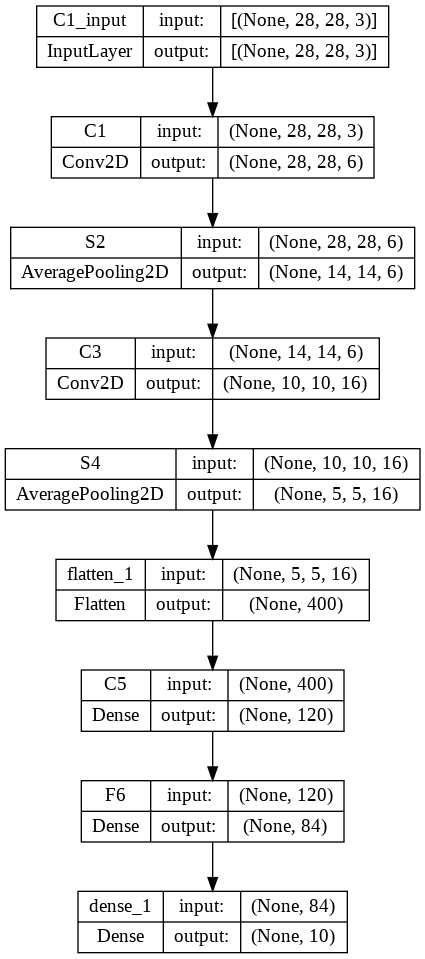

In [ ]:
img_file = './lenet_model.png'
tf.keras.utils.plot_model(lenet_model, to_file = img_file, show_shapes = True, show_layer_names = True)

## Problem 2 - Build Networks Using Blocks (VGG16)

In [ ]:
output_size = 1000
img_size = 224

vgg16_model = tf.keras.models.Sequential([
                # 1st Conv Block
                tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', input_shape = (img_size, img_size, 3), activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), 

                # 2nd Conv Block
                tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), 

                # 3rd Conv block
                tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), 

                # 4th Conv block
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'),
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), 

                # 5th Conv block
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), 
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), 

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units = 4096, activation = 'relu'), 
                tf.keras.layers.Dense(units = 4096, activation = 'relu'), 
                tf.keras.layers.Dense(units = output_size, activation = 'softmax')]) 

vgg16_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_14 (Conv2D)          (None, 222, 222, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 64)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 conv2d_16 (Conv2D)          (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                  

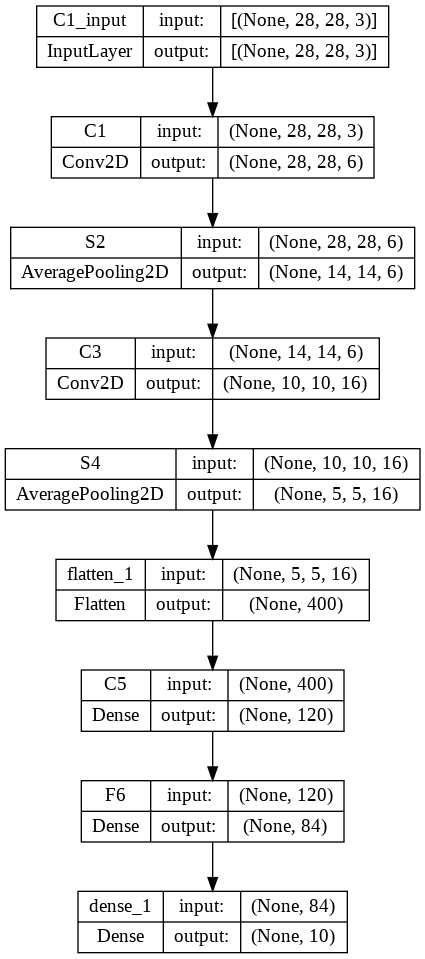

In [ ]:
img_file = './vgg16_model.png'
tf.keras.utils.plot_model(lenet_model, to_file = img_file, show_shapes = True, show_layer_names = True)

## Problem 3 - Image classification using Lenet and VGG16

### 3.1 - Concrete crack dataset

#### Load data

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from imutils import paths
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

In [ ]:
path = "/content/save_model"
os.mkdir(path)

In [ ]:
!pip install GitPython
from git import Repo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 3.4 MB/s 
     |████████████████████████████████| 62 kB 465 kB/s 


In [ ]:
filepath = 'temp_concrete_crack'
Repo.clone_from('https://github.com/bimewok/Concrete-Crack-Image-Classifier', filepath)

<git.repo.base.Repo '/content/temp_concrete_crack/.git'>

In [ ]:
base_dir = '/content/temp_concrete_crack/data/concrete_images'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')



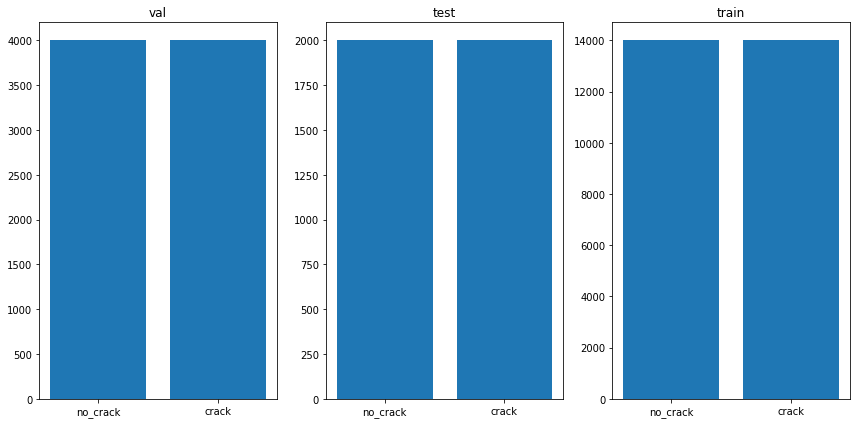

In [ ]:
def show_labels(data_dir):
    data = os.listdir(data_dir)
    fig, ax = plt.subplots(1, len(data), figsize=(12,6))
    for idx in range(len(data)):
        sub_dir = os.path.join(data_dir, data[idx])
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(data[idx])
        # ax[idx].axis('off')
    plt.tight_layout()
    plt.show()
    
show_labels(base_dir)

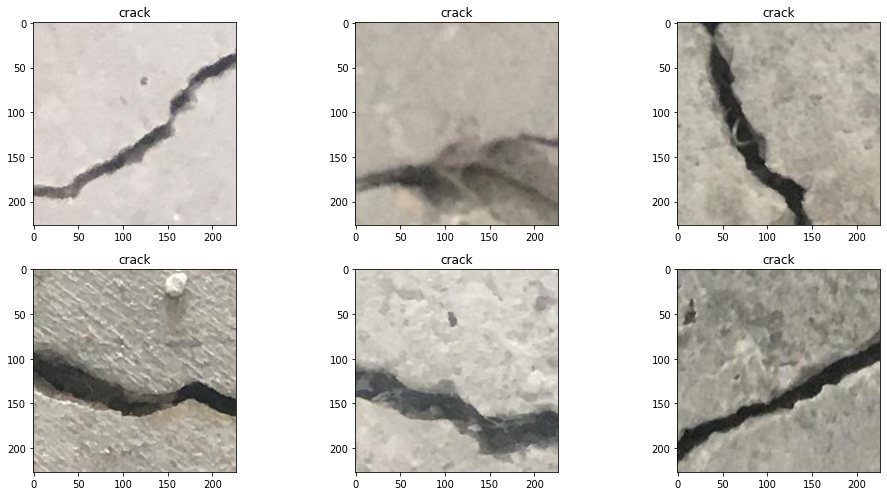

In [ ]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = mpimg.imread(image_dir)
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(label)
    plt.tight_layout()
    plt.show()
  
plot_images(train_dir, label="crack")

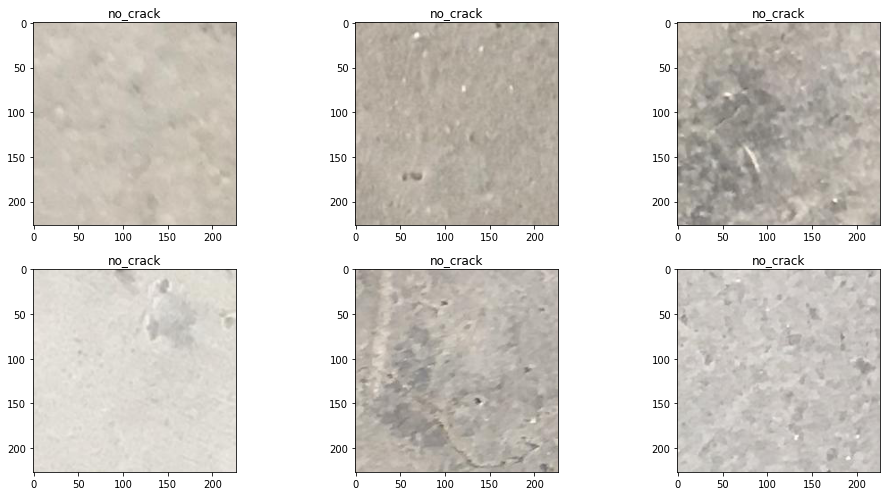

In [ ]:
plot_images(train_dir, label="no_crack")

#### Preprocessing

In [ ]:
img_size = 150 # img.shape[0] = 227
output_size = 1 #Use sigmoid function
batch_size = 256

train_datagen = ImageDataGenerator( rescale=1.0/255.0,
                                    rotation_range=30,
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest" )

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_dataloader = train_datagen.flow_from_directory(train_dir, 
                                                     class_mode='binary', 
                                                     batch_size=batch_size, 
                                                     target_size=(img_size, img_size))

valid_dataloader = val_datagen.flow_from_directory(valid_dir, 
                                         class_mode='binary', 
                                         batch_size=batch_size, 
                                         target_size=(img_size, img_size))

test_dataloader = test_datagen.flow_from_directory(test_dir, 
                                           class_mode='binary', 
                                           batch_size=batch_size, 
                                           target_size=(img_size, img_size))

Found 28000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


#### Model LeNet

In [ ]:

lenet_model = tf.keras.models.Sequential([
           tf.keras.layers.Conv2D(filters = 6, kernel_size = 5, activation = 'relu',  padding='same', input_shape = (img_size, img_size, 3), name = 'C1'), # C1 your code here
            tf.keras.layers.AvgPool2D(pool_size = 2, strides = 2, name = 'S2'), # S2 your code here
            tf.keras.layers.Conv2D(filters = 16, kernel_size = 5, activation = 'relu', name = 'C3'), # C3 your code here
            tf.keras.layers.AvgPool2D(pool_size = 2, strides = 2, name = 'S4'), # S4 your code here
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(120, activation = 'relu', name = 'C5'), # C5 your code here
            tf.keras.layers.Dense(84, activation = 'relu', name = 'F6'), # F6 your code here
            tf.keras.layers.Dense(output_size, activation = 'sigmoid')]) # Output layer, your code here

lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 150, 150, 6)       456       
                                                                 
 S2 (AveragePooling2D)       (None, 75, 75, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 71, 71, 16)        2416      
                                                                 
 S4 (AveragePooling2D)       (None, 35, 35, 16)        0         
                                                                 
 flatten (Flatten)           (None, 19600)             0         
                                                                 
 C5 (Dense)                  (None, 120)               2352120   
                                                                 
 F6 (Dense)                  (None, 84)                1

In [ ]:
lenet_model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
lenet_model.summary()

num_epochs = 10

checkpoint_path = "/content/save_model/lenet_concrete_crack.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = lenet_model.fit(train_dataloader,
                        epochs = num_epochs,
                        validation_data = valid_dataloader,
                        callbacks=[model_checkpoint, learning_rate_reduction])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 150, 150, 6)       456       
                                                                 
 S2 (AveragePooling2D)       (None, 75, 75, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 71, 71, 16)        2416      
                                                                 
 S4 (AveragePooling2D)       (None, 35, 35, 16)        0         
                                                                 
 flatten (Flatten)           (None, 19600)             0         
                                                                 
 C5 (Dense)                  (None, 120)               2352120   
                                                                 
 F6 (Dense)                  (None, 84)                1

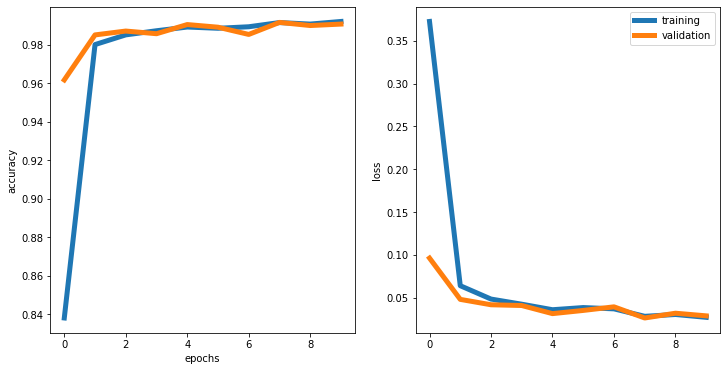

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
lenet_model.load_weights("/content/save_model/lenet_concrete_crack.h5")
loss, accuracy = lenet_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)

16/16 [==============================] - 5s 341ms/step - loss: 0.0180 - accuracy: 0.9950


In [ ]:
img = '/content/images.jpg'
lenet_model.predict('/content/images.jpg')

#### Model VGG-16

In [ ]:
img_size = 224

In [ ]:
vgg16_model = tf.keras.models.Sequential([
                # 1st Conv Block
                tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same', input_shape = (img_size, img_size, 3), activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), #your code here

                # 2nd Conv Block
                tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), #your code here

                # 3rd Conv block
                tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 256, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), #your code here

                # 4th Conv block
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), #your code here

                # 5th Conv block
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.Conv2D(filters = 512, kernel_size = 3, activation = 'relu'), #your code here
                tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2, padding = 'same'), #your code here

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(units = 4096, activation = 'relu'), #your code here
                tf.keras.layers.Dense(units = 4096, activation = 'relu'), #your code here
                tf.keras.layers.Dense(units = output_size, activation = 'sigmoid')]) #your code here #your code here] #your code here

vgg16_model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
vgg16_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_92 (Conv2D)          (None, 222, 222, 64)      36928     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 109, 109, 128)     73856     
                                                                 
 conv2d_94 (Conv2D)          (None, 107, 107, 128)     147584    
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 54, 54, 128)      0         
 g2D)                                                 

In [ ]:
num_epochs = 10

checkpoint_path = "/content/save_model/base_vgg16_concrete_crack.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                        epochs = num_epochs,
                        validation_data = valid_dataloader,
                        callbacks=[model_checkpoint, learning_rate_reduction])

Epoch 1/10


InvalidArgumentError: ignored

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/base_vgg16_concrete_crack.h5")
loss, accuracy = vgg16_model.evaluate(test_dataloader, verbose=1)

#### Improve VGG-16: dùng he_uniform

In [ ]:
vgg16_model = tf.keras.models.Sequential(
                # 1st Conv Block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 2nd Conv Block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 3rd Conv block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 4th Conv block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 5th Conv block
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.Conv2D(, kernel_initializer='he_uniform'), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(), #your code here
                tf.keras.layers.Dense(), #your code here
                tf.keras.layers.Dense() #your code here

vgg16_model.compile(optimizer='sgd',loss="binary_crossentropy", metrics=['accuracy'])
vgg16_model.summary()

In [ ]:
num_epochs = 10

checkpoint_path = "/content/save_model/improved_vgg16_concrete_crack.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/improved_vgg16_concrete_crack.h5")
loss, accuracy = vgg16_model.evaluate(test_dataloader, verbose=1)

### 3.2 - Cassava Leaf Disease

#### Load data

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/emcassavadata/cassavaleafdata.zip \
                -O /content/cassavaleafdata.zip
!unzip '/content/cassavaleafdata.zip'

In [ ]:
base_dir = '/content/cassavaleafdata'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

labels_dict = {
     "cbb": "Cassava Bacterial Blight (CBB)",
     "cbsd": "Cassava Brown Streak Disease (CBSD)",
     "cgm": "Cassava Green Mottle (CGM)",
     "cmd": "Cassava Mosaic Disease (CMD)",
     "healthy": "Healthy"
}

def show_labels(data_dir):
    data = os.listdir(data_dir)
    fig, ax = plt.subplots(1, len(data), figsize=(12,6))
    for idx in range(len(data)):
        sub_dir = os.path.join(data_dir, data[idx])
        labels = os.listdir(sub_dir)
        list_data = []
        for label in labels:
            image_files = list(paths.list_images(os.path.join(sub_dir, label)))
            list_data.append(len(image_files))
        ax[idx].bar(labels, list_data)
        ax[idx].set_title(data[idx])
        # ax[idx].axis('off')
    plt.tight_layout()
    plt.show()
    
show_labels(base_dir)

In [ ]:
def plot_images(data_dir, label, num_sample=6):
    data_dir = os.path.join(data_dir, label)
    image_files = list(paths.list_images(data_dir))[:num_sample]
    fig, ax = plt.subplots(2,num_sample//2, figsize=(14,7))
    for i, image_dir in enumerate(image_files):
        img = mpimg.imread(image_dir)
        label = image_dir.split('/')[-2]
        ax[i//(num_sample//2)][i%(num_sample//2)].imshow(img)
        ax[i//(num_sample//2)][i%(num_sample//2)].set_title(labels_dict[label])
        ax[i//(num_sample//2)][i%(num_sample//2)].axis('off')
    plt.tight_layout()
    plt.show()

plot_images(train_dir, label="cbb")

In [ ]:
plot_images(train_dir, label="cbsd")

In [ ]:
plot_images(train_dir, label="cgm")

In [ ]:
plot_images(train_dir, label="cmd")

In [ ]:
plot_images(train_dir, label="healthy")

#### Processing

In [ ]:
img_size = 150
output_size = 5
batch_size = 128

train_datagen = ImageDataGenerator( rescale=1.0/255.0,
                                    rotation_range=30, 
                                    zoom_range=0.15,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.15,
                                    horizontal_flip=True,
                                    fill_mode="nearest" )

val_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# prepare iterators
train_dataloader = train_datagen.flow_from_directory(train_dir, 
                                                     batch_size=batch_size, 
                                                     target_size=(img_size, img_size))

valid_dataloader = val_datagen.flow_from_directory(valid_dir,  
                                         batch_size=batch_size, 
                                         target_size=(img_size, img_size))

test_dataloader = test_datagen.flow_from_directory(test_dir, 
                                           batch_size=batch_size,
                                           shuffle = False,
                                           target_size=(img_size, img_size))

def show_aug(images):
    fig, axis = plt.subplots(1, 5, figsize=(20, 20))
    axis = axis.flatten()
    for img, ax in zip(images, axis):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

imgs = [train_dataloader[0][0][0] for i in range(5)]
show_aug(imgs)

#### Model LeNet

In [ ]:
lenet_model = tf.keras.models.Sequential(
            tf.keras.layers.Conv2D(), # C1 #your code here
            tf.keras.layers.AvgPool2D(), # S2 #your code here
            tf.keras.layers.Conv2D(), # C3 #your code here
            tf.keras.layers.AvgPool2D(), # S4 #your code here
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(), # C5 #your code here
            tf.keras.layers.Dense(), # F6 #your code here
            tf.keras.layers.Dense()) # Output layer, #your code here

lenet_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
lenet_model.summary()

In [ ]:
num_epochs = 10

checkpoint_path = "/content/save_model/lenet_cassava.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = lenet_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(lenet_model.history.history['accuracy'])), lenet_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(lenet_model.history.history['loss'])), lenet_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
lenet_model.load_weights("/content/save_model/lenet_cassava.h5")
loss, accuracy = lenet_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)
test_pred = lenet_model.predict(test_dataloader)
confusion_matrix(test_pred.argmax(axis = 1), test_dataloader.labels)
report = classification_report(test_pred.argmax(axis = 1), 
                      test_dataloader.labels, 
                      labels = [0,1,2,3,4])
print(report)


#### Model VGG-16

In [ ]:
vgg16_model = tf.keras.models.Sequential(
                # 1st Conv Block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 2nd Conv Block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 3rd Conv block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 4th Conv block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # 5th Conv block
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.Conv2D(), #your code here
                tf.keras.layers.MaxPool2D(), #your code here

                # Fully connected layers
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(), #your code here
                tf.keras.layers.Dense(), #your code here
                tf.keras.layers.Dense() #your code here

vgg16_model.compile(optimizer='adam',loss="categorical_crossentropy", metrics=['accuracy'])
vgg16_model.summary()


In [ ]:
num_epochs=10
checkpoint_path = "/content/save_model/vgg16_cassava.h5"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
            filepath=checkpoint_path,
            verbose=1,
            save_weights_only=True,
            monitor='val_accuracy',
            mode='max',
            save_best_only=True)

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience = 2, 
                                            verbose=1,
                                            factor=0.5, 
                                            min_lr=0.00001)

history = vgg16_model.fit(train_dataloader,
                                epochs = num_epochs,
                                validation_data = valid_dataloader,
                                callbacks=[model_checkpoint, learning_rate_reduction])

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols =2 , figsize = (12,6))
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['accuracy'], linewidth = 5, label = "training")
axs[0].plot(range(len(vgg16_model.history.history['accuracy'])), vgg16_model.history.history['val_accuracy'], linewidth = 5, label = "validation")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['loss'], linewidth = 5, label = "training")
axs[1].plot(range(len(vgg16_model.history.history['loss'])), vgg16_model.history.history['val_loss'], linewidth = 5, label = "validation")
axs[0].set_xlabel("epochs")
axs[0].set_xlabel("epochs")
axs[0].set_ylabel("accuracy")
axs[1].set_ylabel("loss")
plt.legend()

In [ ]:
vgg16_model.load_weights("/content/save_model/vgg16_cassava.h5")
loss, accuracy = vgg16_model.evaluate(test_dataloader, steps=len(test_dataloader), verbose=1)
test_pred = vgg16_model.predict(test_dataloader)
confusion_matrix(test_pred.argmax(axis = 1), test_dataloader.labels)
report = classification_report(test_pred.argmax(axis = 1), 
                      test_dataloader.labels, 
                      labels = [0,1,2,3,4])
print(report)